# Random Forest

### Data Preprocessing

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
data = './input/car_evaluation.csv'
df = pd.read_csv(data, header=None)

In [17]:
df.shape

(1728, 7)

In [18]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Стовпці не мають назв, тому додаю їх вручну

In [19]:
df.columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Class']
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [21]:
df['Class'].value_counts()

Class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [22]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [24]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [25]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


### Building the model

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

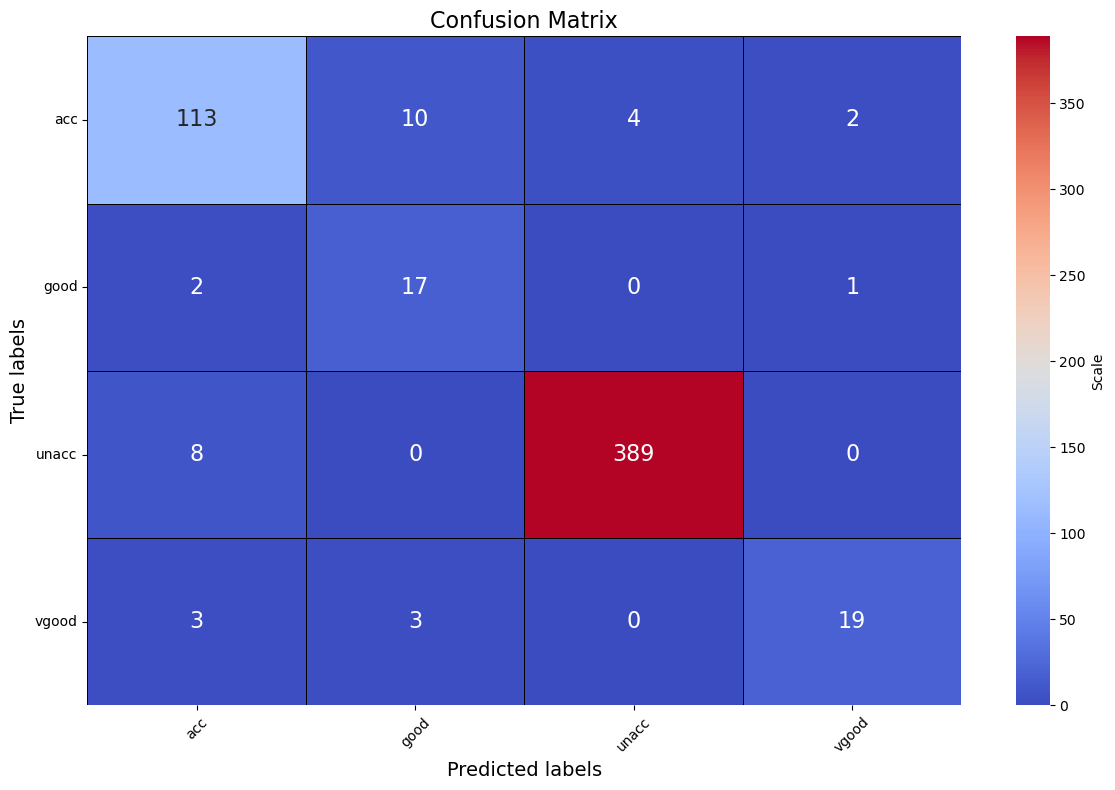

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
plt.figure(figsize=(12,8))

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_, 
            annot_kws={"size": 16}, cbar_kws={'label': 'Scale'}, linewidths=0.5, linecolor='black')

plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


In [30]:
cr = classification_report(y_test, y_pred, target_names=rf_model.classes_)
print(cr)

              precision    recall  f1-score   support

         acc       0.90      0.88      0.89       129
        good       0.57      0.85      0.68        20
       unacc       0.99      0.98      0.98       397
       vgood       0.86      0.76      0.81        25

    accuracy                           0.94       571
   macro avg       0.83      0.87      0.84       571
weighted avg       0.95      0.94      0.94       571



In [31]:
print(cm)

[[113  10   4   2]
 [  2  17   0   1]
 [  8   0 389   0]
 [  3   3   0  19]]


## Аналіз результатів моделі RandomForestClassifier

### 1. Загальна точність моделі

Модель `RandomForestClassifier` досягла загальної точності (accuracy) **94%** на тестових даних, що свідчить про те, що модель правильно класифікує 94% випадків. Цей високий рівень точності вказує на те, що модель добре справляється з розпізнаванням класів у наборі даних.

---

### 2. Метрики для кожного класу

- **Class 'acc'**:
  - Precision: 0.90
  - Recall: 0.88
  - F1-score: 0.89
  - Модель добре працює для класу `acc`, що означає високу точність у передбаченні цього класу. Модель вірно класифікувала більшість об'єктів цього класу.
  
- **Class 'good'**:
  - Precision: 0.57
  - Recall: 0.85
  - F1-score: 0.68
  - Модель менш точна в передбаченні класу `good`, хоча відгук (recall) є дуже високим. Це означає, що модель розпізнає більшість об'єктів класу `good`, але часто плутає їх з іншими класами.
  
- **Class 'unacc'**:
  - Precision: 0.99
  - Recall: 0.98
  - F1-score: 0.98
  - Модель практично без помилок класифікує клас `unacc`, що свідчить про її високу точність і відгук. Це найкращий результат серед усіх класів.

- **Class 'vgood'**:
  - Precision: 0.86
  - Recall: 0.76
  - F1-score: 0.81
  - Для класу `vgood` модель має досить високі показники, але дещо нижчий відгук, що означає можливість помилок при розпізнаванні об'єктів цього класу.

---

### 3. Матриця плутанини (Confusion Matrix)

Матриця плутанини показує, як модель класифікує кожен клас:

|   | acc | good | unacc | vgood |
|---|-----|------|-------|-------|
| **acc** | 113 | 10 | 4 | 2 |
| **good** | 2 | 17 | 0 | 1 |
| **unacc** | 8 | 0 | 389 | 0 |
| **vgood** | 3 | 3 | 0 | 19 |

- **Клас 'acc'**: 113 з 129 об'єктів правильно класифіковані, деякі переплутані з іншими класами (`good`, `unacc`, `vgood`).
- **Клас 'good'**: 17 з 20 об'єктів класифіковані правильно, з декількома помилками.
- **Клас 'unacc'**: 389 з 397 об'єктів правильно класифіковані, що показує високу ефективність для цього класу.
- **Клас 'vgood'**: 19 з 25 об'єктів класифіковані правильно, інші були помилково віднесені до інших класів.

---

### 4. Висновки

- **Загальна точність моделі** є високою — **94%**, що свідчить про гарну здатність моделі класифікувати автомобілі в правильні категорії.
- **Клас 'unacc'** класифікується майже без помилок, що є найсильнішою стороною моделі.
- **Клас 'good'** має нижчу точність, що свідчить про труднощі в розпізнаванні цього класу, але модель має високий відгук, тобто вона добре вловлює об'єкти цього класу.
- **Класи 'acc' і 'vgood'** мають хороші показники, але можна розглянути можливість покращення їх точності через подальшу оптимізацію моделі.


### ROC AUC

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from itertools import cycle

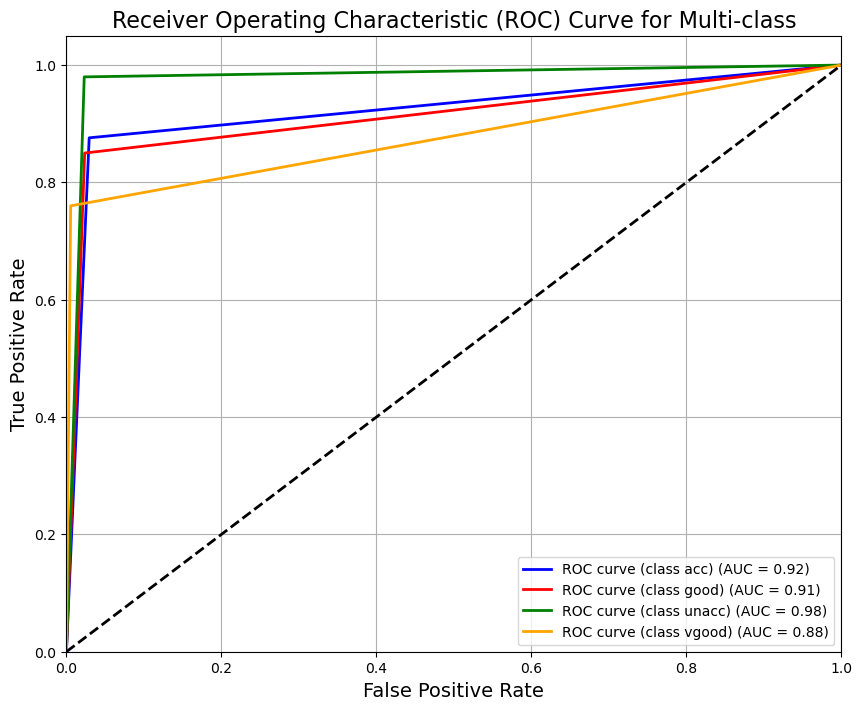

In [33]:
class_names = rf_model.classes_

y_test_bin = label_binarize(y_test, classes=class_names)
y_pred_bin = label_binarize(y_pred, classes=class_names)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {class_names[i]}) (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class', fontsize=16)
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [34]:
macro_roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average="macro")
print(f'Macro-average AUC score: {macro_roc_auc:.2f}')

weighted_roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average="weighted")
print(f'Weighted-average AUC score: {weighted_roc_auc:.2f}')

Macro-average AUC score: 0.92
Weighted-average AUC score: 0.96


In [35]:
print(roc_auc)

{0: 0.9232786137710899, 1: 0.9132032667876588, 2: 0.9784301803758071, 3: 0.8772527472527473}


## Аналіз результатів ROC та AUC для моделі RandomForestClassifier

### 1. AUC для кожного класу

Модель `RandomForestClassifier` була оцінена за допомогою ROC-кривої та значення AUC для кожного класу. Значення AUC (Area Under the Curve) вказують на те, наскільки добре модель може відрізнити між різними класами. Результати для кожного класу:

- **Class 'acc'**:
  - AUC = 0.92
  - Це дуже високий показник, що вказує на те, що модель добре розрізняє клас `acc` і правильно класифікує більшість випадків цього класу.
  
- **Class 'good'**:
  - AUC = 0.91
  - Модель також добре справляється з класифікацією класу `good`, хоча AUC трохи нижчий, ніж у класу `acc`. Це означає, що модель має хорошу здатність до розпізнавання цього класу.
  
- **Class 'unacc'**:
  - AUC = 0.98
  - Модель має найвищий показник AUC для класу `unacc`, що вказує на майже ідеальну класифікацію цього класу. Це клас, який модель розпізнає найкраще.
  
- **Class 'vgood'**:
  - AUC = 0.88
  - Модель має трохи нижчий показник AUC для класу `vgood`, хоча це також є хорошим результатом, але можуть бути незначні проблеми з розпізнаванням деяких об'єктів цього класу.

### 2. Середнє значення AUC

- **Macro-average AUC score**: 0.92
  - **Macro-average** обчислює середнє значення AUC для всіх класів без урахування частоти кожного класу. Це означає, що модель загалом добре класифікує кожен клас, але можливі незначні помилки в рідкісних класах.
  
- **Weighted-average AUC score**: 0.96
  - **Weighted-average** враховує частоту кожного класу. Це означає, що модель дуже добре працює з найбільш поширеними класами (наприклад, клас `unacc`), що призводить до високого загального AUC.

### 3. Висновки

- **Значення AUC для всіх класів** знаходяться в діапазоні від 0.88 до 0.98, що свідчить про те, що модель має високу здатність до класифікації об'єктів у всі категорії.
- **Клас `unacc`** має найвищий показник AUC (0.98), що робить його найкраще класифікованим класом моделлю.
- **Клас `vgood`** має трохи нижчий показник AUC (0.88), але все ще добре розпізнається моделлю.
- **Macro-average AUC** показує, що модель загалом добре класифікує всі класи (0.92).
- **Weighted-average AUC** (0.96) підтверджує, що модель особливо добре працює з найбільш поширеними класами, що є гарним показником для задач з нерівномірним розподілом класів.


# XGboosting

In [38]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [39]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [45]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_encoded)
y_pred_xgb_encoded = xgb_model.predict(X_test)
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

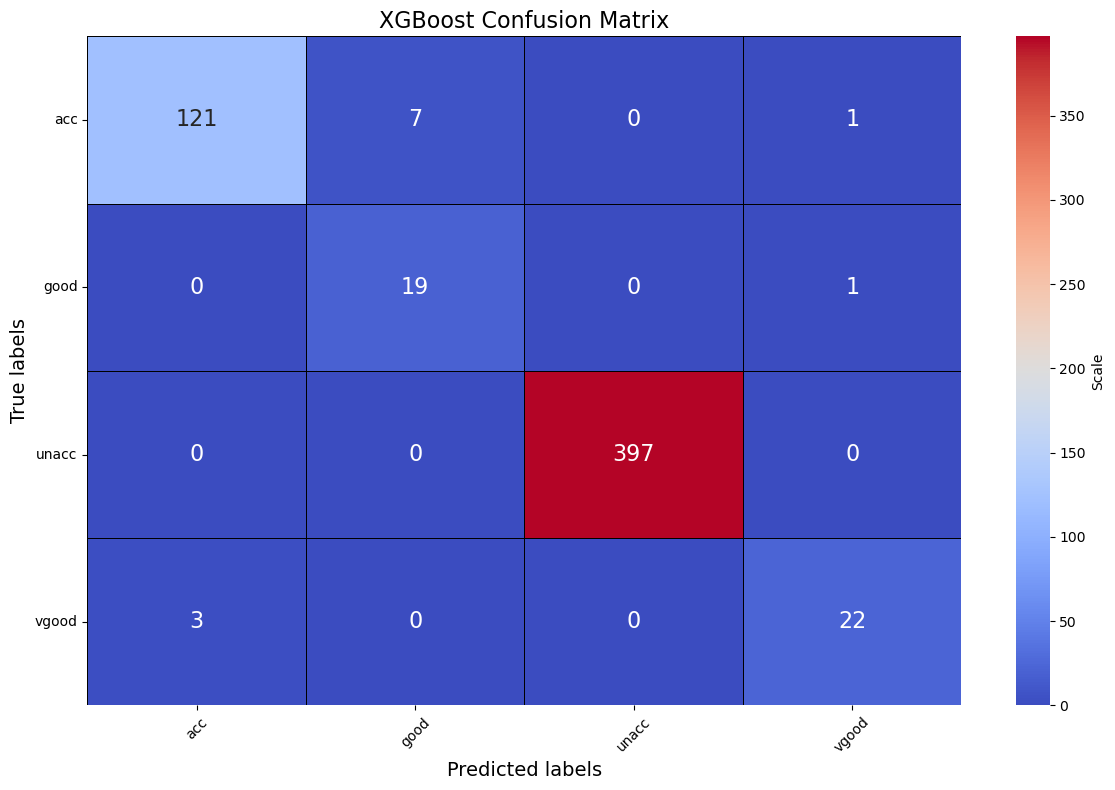

In [46]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test_decoded, y_pred_xgb, labels=label_encoder.classes_)
plt.figure(figsize=(12, 8))

# Visualize Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, 
            annot_kws={"size": 16}, cbar_kws={'label': 'Scale'}, linewidths=0.5, linecolor='black')

plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('XGBoost Confusion Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [47]:
print("Classification Report for XGBoost:\n")
cr_xgb = classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_)
print(cr_xgb)

Classification Report for XGBoost:

              precision    recall  f1-score   support

         acc       0.98      0.94      0.96       129
        good       0.73      0.95      0.83        20
       unacc       1.00      1.00      1.00       397
       vgood       0.92      0.88      0.90        25

    accuracy                           0.98       571
   macro avg       0.91      0.94      0.92       571
weighted avg       0.98      0.98      0.98       571



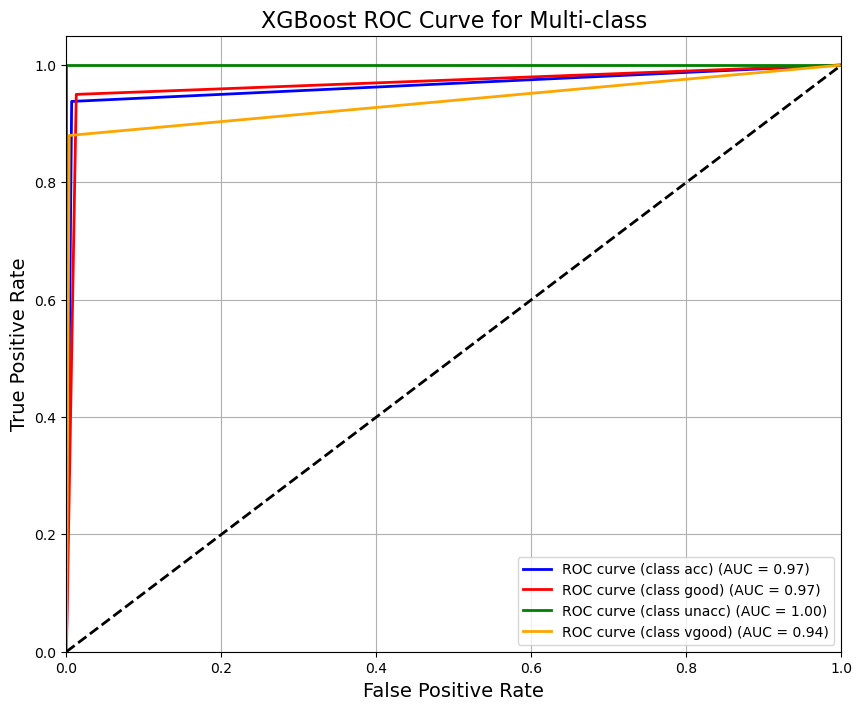

In [48]:
y_test_bin = label_binarize(y_test_encoded, classes=[0, 1, 2, 3])
y_pred_bin_xgb = label_binarize(y_pred_xgb_encoded, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()

for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_xgb[i], tpr_xgb[i], color=color, lw=2,
             label=f'ROC curve (class {label_encoder.classes_[i]}) (AUC = {roc_auc_xgb[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('XGBoost ROC Curve for Multi-class', fontsize=16)
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [49]:
# Calculate the overall AUC score (macro-average)
macro_roc_auc_xgb = roc_auc_score(y_test_bin, y_pred_bin_xgb, average="macro")
print(f'Macro-average AUC score for XGBoost: {macro_roc_auc_xgb:.2f}')

# Calculate the overall AUC score (weighted-average)
weighted_roc_auc_xgb = roc_auc_score(y_test_bin, y_pred_bin_xgb, average="weighted")
print(f'Weighted-average AUC score for XGBoost: {weighted_roc_auc_xgb:.2f}')

Macro-average AUC score for XGBoost: 0.97
Weighted-average AUC score for XGBoost: 0.99


## Порівняння моделей: RandomForest vs XGBoost

### 1. Загальна точність (Accuracy)

- **RandomForest**: 0.94
- **XGBoost**: 0.98

XGBoost продемонстрував кращу загальну точність (98%) у порівнянні з RandomForest (94%), що свідчить про те, що XGBoost краще справляється із класифікацією об'єктів у правильні категорії.

---

### 2. Метрики для кожного класу

#### Клас 'acc':
- **RandomForest**: 
  - Precision: 0.90, Recall: 0.88, F1-score: 0.89
- **XGBoost**: 
  - Precision: 0.98, Recall: 0.94, F1-score: 0.96

XGBoost значно покращив класифікацію класу `acc` в усіх метриках порівняно з RandomForest. 

#### Клас 'good':
- **RandomForest**: 
  - Precision: 0.57, Recall: 0.85, F1-score: 0.68
- **XGBoost**: 
  - Precision: 0.73, Recall: 0.95, F1-score: 0.83

XGBoost також покращив результати для класу `good`, особливо щодо precision та f1-score. Це свідчить про те, що XGBoost краще справляється з менш поширеними класами.

#### Клас 'unacc':
- **RandomForest**: 
  - Precision: 0.99, Recall: 0.98, F1-score: 0.98
- **XGBoost**: 
  - Precision: 1.00, Recall: 1.00, F1-score: 1.00

Для класу `unacc`, XGBoost досяг ідеальної класифікації, хоча RandomForest теж мав близькі результати.

#### Клас 'vgood':
- **RandomForest**: 
  - Precision: 0.86, Recall: 0.76, F1-score: 0.81
- **XGBoost**: 
  - Precision: 0.92, Recall: 0.88, F1-score: 0.90

XGBoost показав покращення для класу `vgood`, досягнувши вищих результатів щодо точності та відгуку.

---

### 3. ROC AUC

#### RandomForest ROC AUC:
- **acc**: 0.92
- **good**: 0.91
- **unacc**: 0.98
- **vgood**: 0.88
- **Macro-average**: 0.92
- **Weighted-average**: 0.96

#### XGBoost ROC AUC:
- **acc**: 0.97
- **good**: 0.97
- **unacc**: 1.00
- **vgood**: 0.94
- **Macro-average**: 0.97
- **Weighted-average**: 0.99

XGBoost показав вищі значення ROC AUC для всіх класів, що вказує на кращу здатність відрізняти між класами. Особливо це видно в класах `acc` та `vgood`, де XGBoost значно покращив результати.

---

### 4. Висновки

- **XGBoost** значно покращив точність та метрики для всіх класів порівняно з **RandomForest**, особливо для менш поширених класів, таких як `good` та `vgood`.
- **Macro-average AUC** для XGBoost склав **0.97**, що є вищим за показник RandomForest (**0.92**). Це означає, що XGBoost краще справляється з класифікацією всіх класів, навіть рідкісних.
- **Weighted-average AUC** для XGBoost досягнув **0.99**, порівняно з **0.96** у RandomForest, що свідчить про значне покращення класифікації найбільш поширених класів.
- Таким чином, **XGBoost** є більш ефективною моделлю у цьому випадку, з кращими показниками точності та загальною якістю класифікації.